In [21]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import callbacks
from keras.models import Sequential
from keras.layers import Dense, Input
import os

In [3]:
n_test = 40000
k = 100
good_data = True
gseed = 6
degree = 4

In [4]:
""" ------------- LOADING DATA ----------------------------"""

if good_data:
    X = np.load("X_convex_{}.npy".format(degree))
    Y = np.load("Y_convex_{}.npy".format(degree))
else :
    X = np.random.randint(0, 100, size=(n_test * 2, 22))
    Y = np.random.randint(0, 2, size=(n_test * 2))

In [5]:
"""------------------NORMALIZING DATA-------------------------"""

X_mean = np.mean(X, axis = 0)
X_std = np.std(X, axis = 0)
X_normalized = (X - X_mean) / X_std
X_train = X_normalized[:n_test,:22]

Y_train = Y[:n_test]
X_valid = X_normalized[n_test:,:22]
Y_valid = Y[n_test:]

In [6]:
"""---------------------DEFINING MODEL-------------------------"""

def custom_activation(x):
    return 0.5 * (1 + tf.math.sign(x)) * (x + 1/100) +  0.5 * (1 - tf.math.sign(x)) * tf.math.exp(tf.math.minimum(0.0,x)) / 100

def custom2_activation(x):
    return tf.where(x < 0, tf.exp(tf.math.minimum(0.0, x) * k) / k, x + 1/k)

model = Sequential([])
model.add(Input(shape=(22,)))
model.add(Dense(200, activation=custom_activation, kernel_initializer=tf.keras.initializers.RandomUniform(minval=-7.0, maxval=7.0, seed=gseed)))
model.add(Dense(200, activation=custom_activation))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=["accuracy"])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 200)            │         4,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,001 (175.79 KB)

 Trainable params: 45,001 (175.79 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
"""------------- MODEL DEFINITION-------------------"""

def learning_rate(epoch):
    if epoch < 30 :
        return 1e-3
    elif epoch < 35 :
        return 1e-4
    else :
        return 1e-5
    
learning_rate_cb = callbacks.LearningRateScheduler(learning_rate)

history = model.fit(X_train, Y_train, epochs=40, batch_size=16, callbacks=[learning_rate_cb])

Epoch 1/40
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.6962 - loss: 0.8303 - learning_rate: 0.0010
Epoch 2/40
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8822 - loss: 0.2827 - learning_rate: 0.0010
Epoch 3/40
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9146 - loss: 0.2026 - learning_rate: 0.0010
Epoch 4/40
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9251 - loss: 0.1800 - learning_rate: 0.0010
Epoch 5/40
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9384 - loss: 0.1528 - learning_rate: 0.0010
Epoch 6/40
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9431 - loss: 0.1378 - learning_rate: 0.0010
Epoch 7/40
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9463 - loss: 0.1277 - learning_rate: 0.0010
Epoch 8/40
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9526 - loss: 0.1168 - learning_rate: 0.0010
Epoch 9/40
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9591 - loss: 0.1033 - learning_rate:

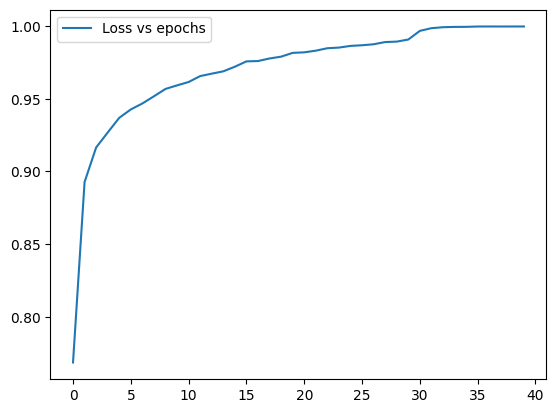

354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9486 - loss: 0.2634
Test accuracy: 0.9500796794891357


In [23]:
"""------------------ EVALUATING MODEL ------------------"""
fhst=plt.figure()
ax=fhst.add_subplot()
ax.plot(history.history['accuracy'][0:], label='Loss vs epochs')
ax.legend()
plt.show()

loss, accuracy = model.evaluate(X_valid, Y_valid)
print("Test accuracy:", accuracy)

In [20]:
"""------------------- SAVING MODEL --------------------"""
number = 0

filename = f"model_{number}.keras"
while os.path.exists(filename):
    number = number + 1
    filename = f"model_{number}.keras"

model.save(filename)